# Project-2 Insurance

In [2]:
# importing necesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

making fataframe of our dataset

In [3]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
 #checking for null values

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# Seperating catagorical  and numarical columns

# checking for catagorical columns
catagorical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        catagorical_col.append(i)
print("Catagorical columns: ",catagorical_col)
print("\n")

#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
        
print("Numerical columns: ",numerical_col)
    
print("\n")

Catagorical columns:  ['sex', 'smoker', 'region']


Numerical columns:  ['age', 'bmi', 'children', 'charges']




# Lets do some graphical analysis

<Axes: >

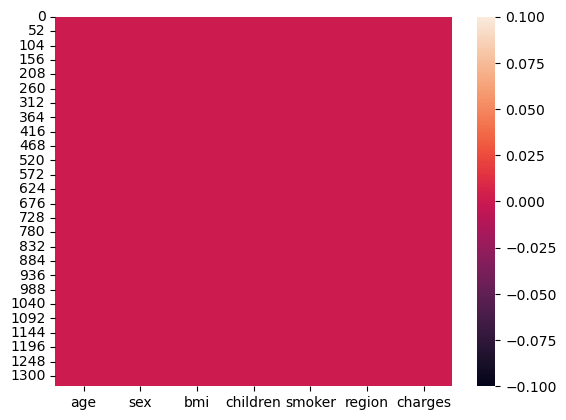

In [14]:
sns.heatmap(df.isnull())

<Axes: xlabel='sex', ylabel='count'>

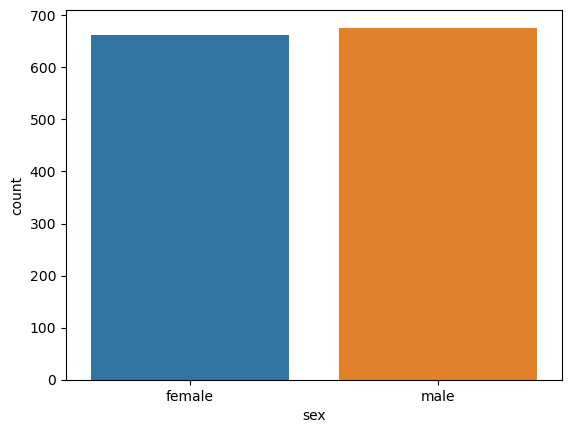

In [15]:
#checking values using countplot
sns.countplot(x="sex", data=df)

<Axes: xlabel='smoker', ylabel='count'>

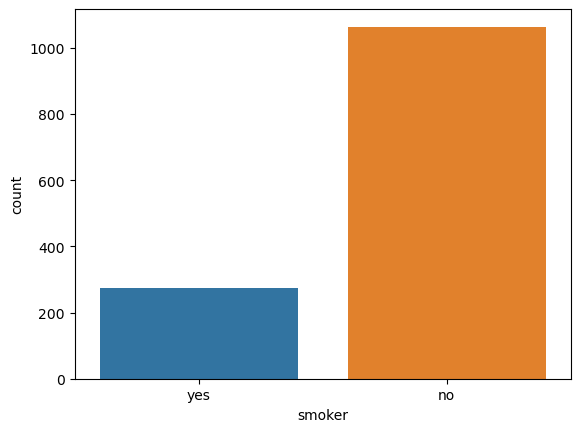

In [16]:
#checking values using countplot
sns.countplot(x="smoker", data=df)

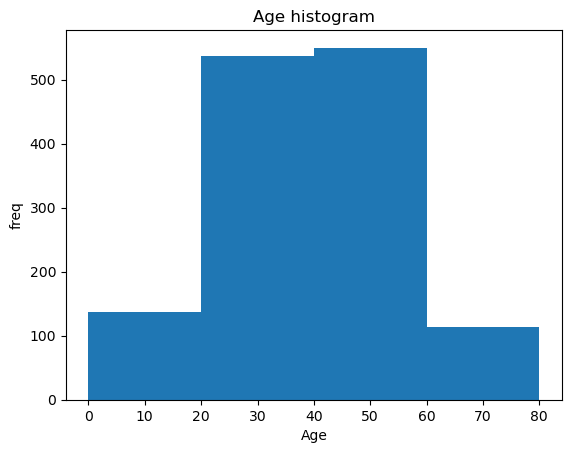

In [19]:
plt.hist(df['age'],bins=[0,20,40,60,80])

plt.title('Age histogram')
plt.xlabel('Age')
plt.ylabel('freq')
plt.show()

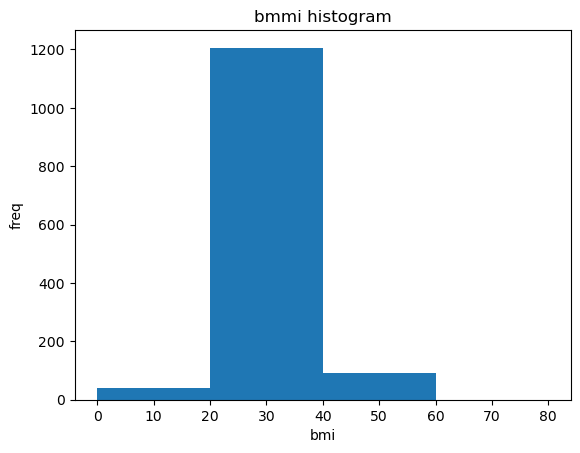

In [20]:
plt.hist(df['bmi'],bins=[0,20,40,60,80])

plt.title('bmmi histogram')
plt.xlabel('bmi')
plt.ylabel('freq')
plt.show()

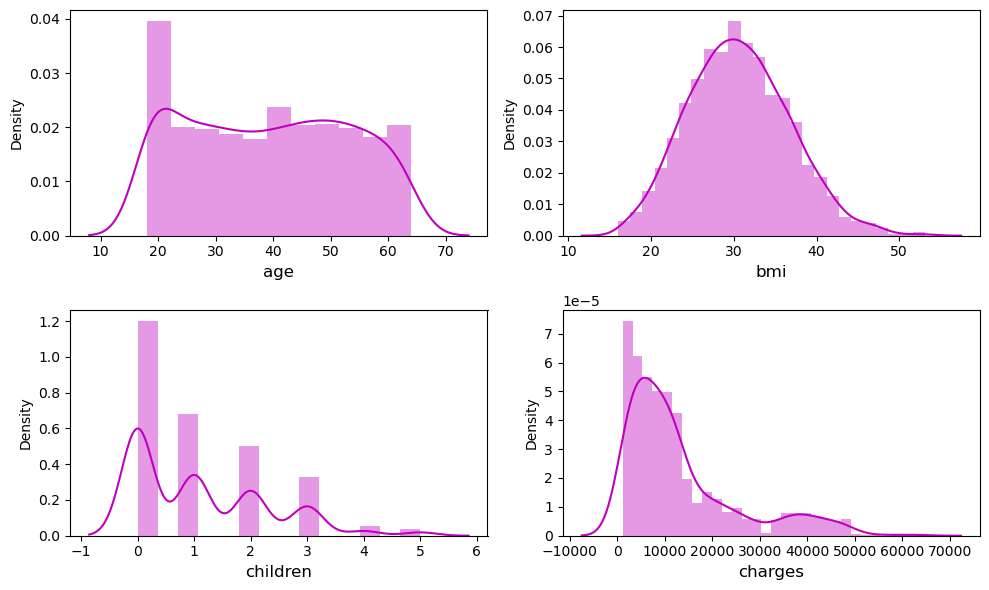

In [21]:
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
        
    plotnumber+=1
plt.tight_layout()

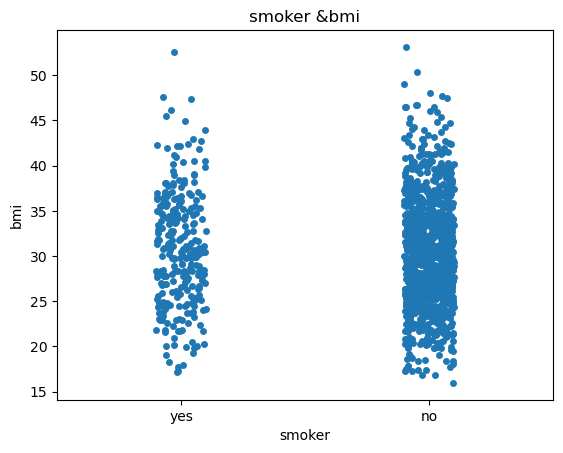

In [23]:

sns.stripplot(x='smoker',y='bmi',data =df)
plt.title("smoker &bmi")
plt.show()

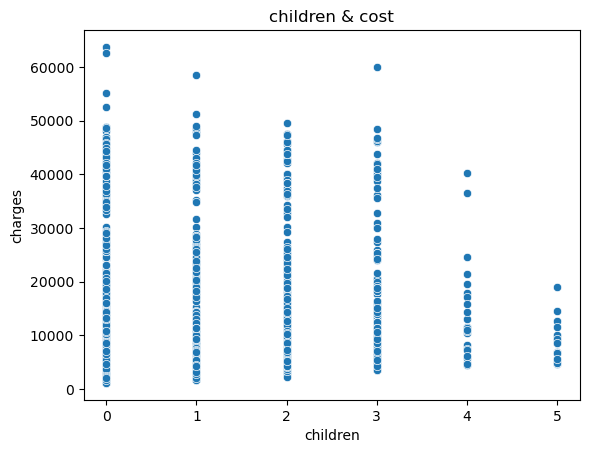

In [25]:
sns.scatterplot(x='children',y='charges',data =df)
plt.title("children & cost")
plt.show()

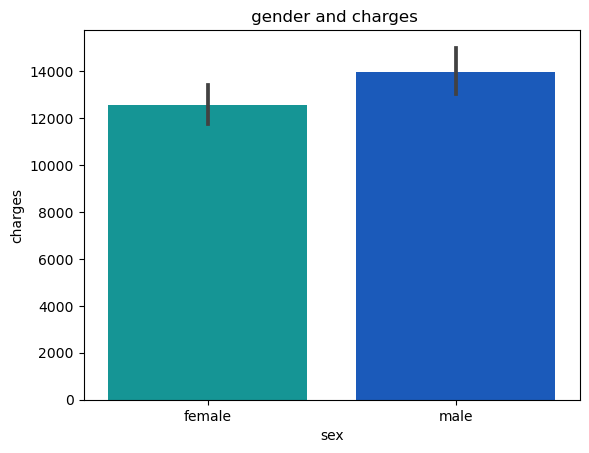

In [29]:
# comparing gender znd Seniorcitzen on the basis of churn
plt.title(" gender and charges")
sns.barplot( x = "sex",y ="charges", data=df,  palette= 'winter_r')
plt.show()

# detecting outliers

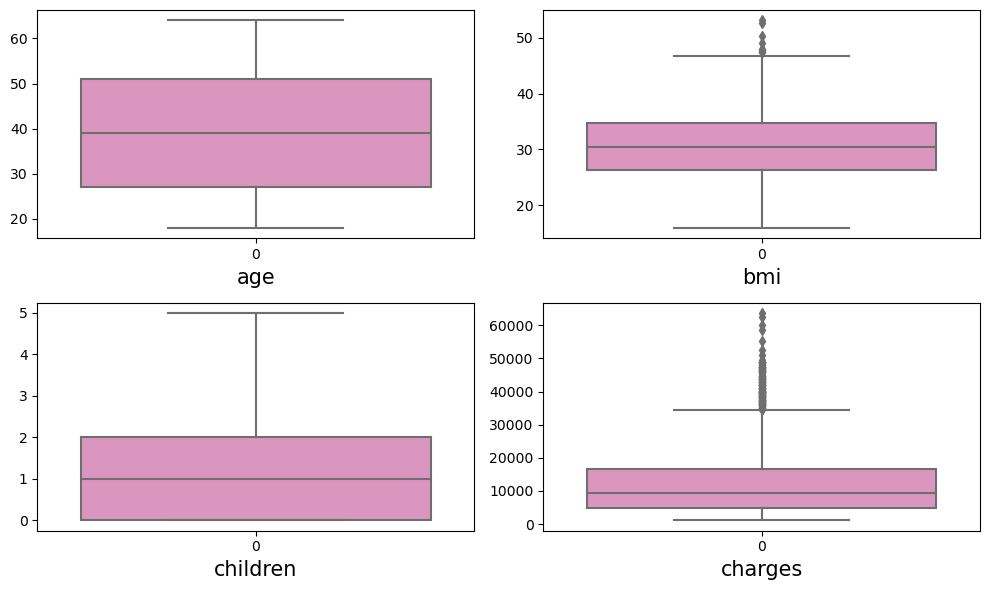

In [36]:
# lets check the outliers by plotting boxplot

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

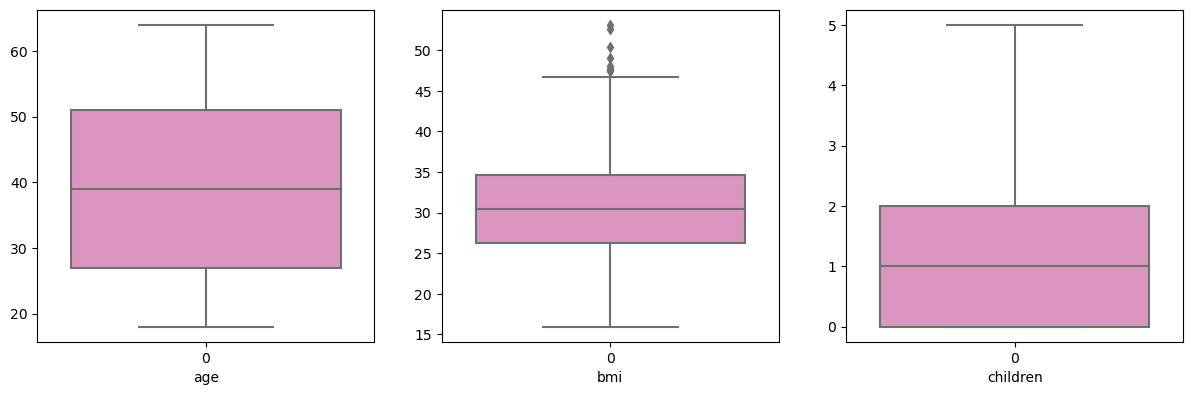

In [62]:
# lets check the outliers by plotting boxplot
plt.figure(figsize=(20,25))
p=1
for x in numerical_col:
    if p<=3:
        plt.subplot(5,4,p)
        sns.boxplot(df[x], palette= "Set2_r")
        plt.xlabel(x)
        
    p+=1
    
plt.show()
    
    

In [54]:
from scipy.stats import zscore
out_features=df[['age','bmi','children']]
z=np.abs(zscore(out_features))
z

,age,bmi,children
0,1.438764,0.453320,0.908614
1,1.509965,0.509621,0.078767
2,0.797954,0.383307,1.580926
3,0.441948,1.305531,0.908614
4,0.513149,0.292556,0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,1.509965,0.206139,0.908614
1335,1.509965,1.014878,0.908614
1336,1.296362,0.797813,0.908614


In [55]:
# threshold=3
np.where(z>3)

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
         932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
       dtype=int64),
 array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
       dtype=int64))

In [57]:
df.iloc[32,2]

28.6

In [58]:
# removing outliers and creating new dataframe
Df=df[(z<3).all(axis=1)]
Df.shape

(1316, 7)

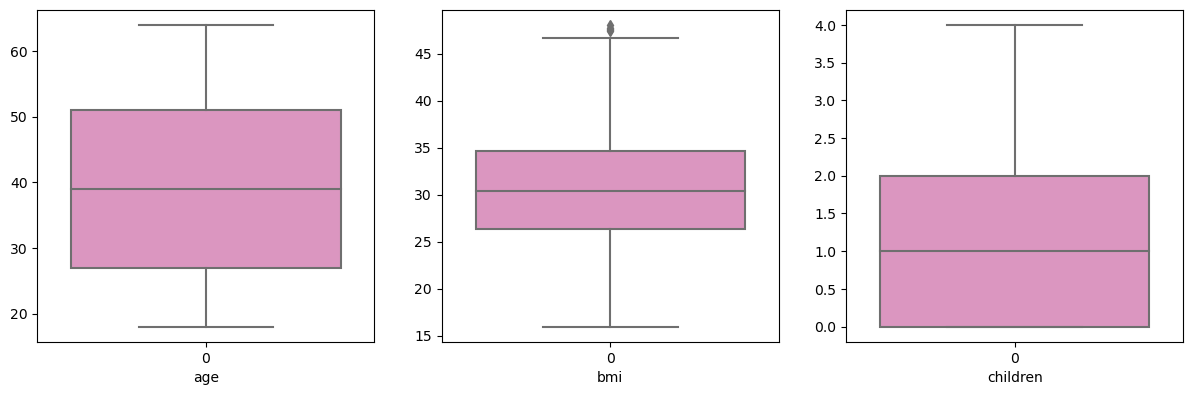

In [61]:
# lets check the boxplot after removal of outliers
plt.figure(figsize=(20,25))
p=1
for x in numerical_col:
    if p<=3:
        plt.subplot(5,4,p)
        sns.boxplot(Df[x], palette= "Set2_r")
        plt.xlabel(x)
        
    p+=1
    
plt.show()

#checlking for skewness

In [64]:
Df.skew()

age         0.049904
bmi         0.193564
children    0.740881
charges     1.501055
dtype: float64

#Removing skewness from children

In [66]:
Df['children']=np.cbrt(Df['children'])

In [67]:
Df.skew()

age         0.049904
bmi         0.193564
children   -0.098422
charges     1.501055
dtype: float64

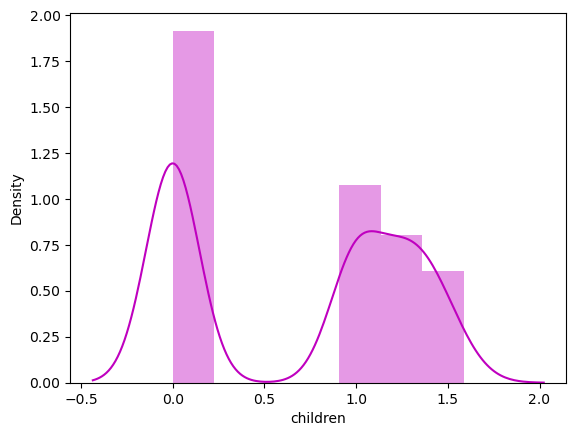

In [68]:
sns.distplot(Df['children'],color='m')
plt.show()

Correlation between target variable and independent variables

In [72]:
Df.corr()

,age,bmi,children,charges
age,1.000000,0.119062,0.056962,0.299554
bmi,0.119062,1.000000,0.024359,0.203195
children,0.056962,0.024359,1.000000,0.081491
charges,0.299554,0.203195,0.081491,1.000000


In [74]:
Df.corr().charges.sort_values()

children    0.081491
bmi         0.203195
age         0.299554
charges     1.000000
Name: charges, dtype: float64

In [75]:
x=Df.drop('charges',axis=1)
y=Df['charges']

In [78]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0.00000,yes,southwest
1,18,male,33.770,1.00000,no,southeast
2,28,male,33.000,1.44225,no,southeast
3,33,male,22.705,0.00000,no,northwest
4,32,male,28.880,0.00000,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,1.44225,no,northwest
1334,18,female,31.920,0.00000,no,northeast
1335,18,female,36.850,0.00000,no,southeast
1336,21,female,25.800,0.00000,no,southwest


In [79]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1316, dtype: float64

Lets scale  our dataset using standard scalirazation

In [89]:
# Encoding catagorical columns using ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in Df.columns:
    if Df[i].dtypes=='object':
        Df[i] = OE.fit_transform(Df[i].values.reshape(-1,1))
        
Df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.44225,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.00000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.00000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.00000,0.0,3.0,2007.94500


In [143]:
x=Df.drop('charges',axis=1)
y=Df['charges']

In [144]:
from sklearn.preprocessing import StandardScaler
x=pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-1.108972,1.959141,1.352089
1,-1.512509,0.993939,0.527239,0.529892,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.254679,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-1.108972,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-1.108972,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.254679,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-1.108972,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-1.108972,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-1.108972,-0.510428,1.352089


# Lets Check Variance Inflation Factor

In [145]:
#finding variance inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.018855,age
1,1.008563,sex
2,1.043215,bmi
3,1.004191,children
4,1.007367,smoker
5,1.026341,region


# Model building

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0

Creating train test split

In [147]:
maXAccu=0
MaxRS=0

In [148]:
# finding the best accuracy state


for i in range(1,400):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.27, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred= lr.predict(x_test)
    acc= r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("max r2_score  is ", maxAccu, "at random_state", maxRS)

max r2_score  is  0.8086464592198984 at random_state 338


In [149]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRS)

In [150]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [151]:
Lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(Lr)
print("R2_score:",r2_score(y_test,predlr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean_absolute_error:',mean_absolute_error(y_test,predlr))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,predlr)))



LinearRegression()
R2_score: 0.789771961335995
R2_score on training data: 73.01184421152217
mean_absolute_error: 4235.892537878059
mean_squared_error: 5851.703694862104
